# Construction of Concentration Profile function

In [281]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/renanxcortes/inequality-segregation-supplementary-files/master/data/std_2010_fullcount.csv'
census_2010 = pd.read_csv(url, encoding = "ISO-8859-1", sep = ",")
df = census_2010.loc[census_2010.county == "Riverside County"][['trtid10','tract','pop10','nhblk10']]
df.head()

,trtid10,tract,pop10,nhblk10
5727,6065042012,Census Tract 420.12,6242,677
5729,6065041911,Census Tract 419.11,10258,844
5731,6065041910,Census Tract 419.10,6342,405
5733,6065040816,Census Tract 408.16,2594,346
5735,6065040815,Census Tract 408.15,3586,429


In [282]:
t = 0.05
g_t_i = np.where(df.nhblk10 / df.pop10 >= t, 1, 0)
g_t_i

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [283]:
v_t = (g_t_i * df.nhblk10).sum() / df.nhblk10.sum()
v_t

0.8207867439040819

In [284]:
grid = np.linspace(0, 1, 100)

In [285]:
def calculate_vt(t):
    g_t_i = np.where(df.nhblk10 / df.pop10 >= t, 1, 0)
    v_t = (g_t_i * df.nhblk10).sum() / df.nhblk10.sum()
    return v_t

In [286]:
curve = np.array(list(map(calculate_vt, grid)))

In [287]:
grid[grid < 0.1]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

In [288]:
curve[grid < 0.1]

array([1.        , 0.99556783, 0.97048363, 0.93305267, 0.88345682,
       0.81794423, 0.74631551, 0.66336387, 0.56264987, 0.50344874])

# Constructing the function

In [289]:
def conprof(data, group_pop_var, total_pop_var, m = 1000):
    '''
    data: a geopandas DataFrame that contains a geometry column
    group_pop_var: the name of variable that contains the population size of the group of interest
    total_pop_var: the name of variable that contains the total population of the unit
    m: a numeric value indicating the number of thresholds to be used. A large value of m creates a smoother-looking graph and a more precise concentration profile value but slows down the calculation speed.
    '''
    
    data = data.rename(columns={group_pop_var: 'group_pop_var', 
                                total_pop_var: 'total_pop_var'})
    
    def calculate_vt(t):
        g_t_i = np.where(data.group_pop_var / data.total_pop_var >= t, 1, 0)
        v_t = (g_t_i * data.group_pop_var).sum() / data.group_pop_var.sum()
        return v_t
    
    grid = np.linspace(0, 1, m)
    curve = np.array(list(map(calculate_vt, grid)))
    
    threshold = data.group_pop_var.sum() / data.total_pop_var.sum()
    R = ((threshold - ((curve[grid < threshold]).sum() / m - (curve[grid >= threshold]).sum()/ m)) / (1 - threshold))
    
    return R, grid, curve, threshold

In [290]:
cp_index = conprof(df, 'nhblk10', 'pop10', m = 1000)
cp_index[0]

0.06393365660089256

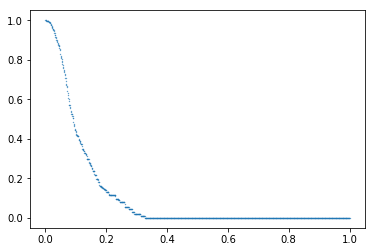

In [280]:
matplotlib.pyplot.scatter(cp_index[1], 
                          cp_index[2], s = 0.1)